<a href="https://colab.research.google.com/github/jhurlbut/3dmodels/blob/master/demos/PixelDrawer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

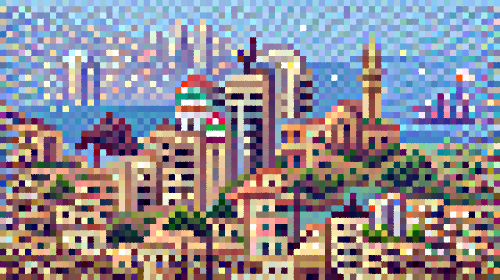
<br>
Beirut Skyline by <a href="https://twitter.com/gorillasu">Ahmad Moussa</a><br>
# CLIPIT PixelDraw demo

This version of the notebook is setup to easily change from VQGAN to PixelDraw to render the image.

In [1]:
#@title Setup
 
#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. For setup,
#@markdown **you need to run this cell,
#@markdown then choose Runtime -> Restart Runtime from the menu,
#@markdown and then run the cell again**. It should remind you to
#@markdown do this after the first run.
 
#@markdown Setup can take 5-10 minutes, but once it is complete it usually does not need to be repeated
#@markdown until you close the window.
 
#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.
 
# https://stackoverflow.com/a/56727659/1010653
 
from IPython.utils import io
with io.capture_output() as captured:
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone https://github.com/dribnet/clipit
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy
 
  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom
 
  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
 
import sys
sys.path.append("clipit")
 
result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"
 
js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
100%|███████████████████████████████████████| 244M/244M [00:04<00:00, 57.2MiB/s]
100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 63.8MiB/s]
100%|████████████████████████████████████████| 335M/335M [00:01<00:00, 191MiB/s]


Using device: cuda:0
Optimising using: AdamP
Using text prompts: ['synthesizer. #pixelart']
Using seed: 11323052271453352100


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/kornia/utils/helpers.py:96: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  out1, out2 = torch.solve(input.to(dtype), A.to(dtype))


iter: 0, loss: 2.71548, losses: 0.944262, 0.86996, 0.90126


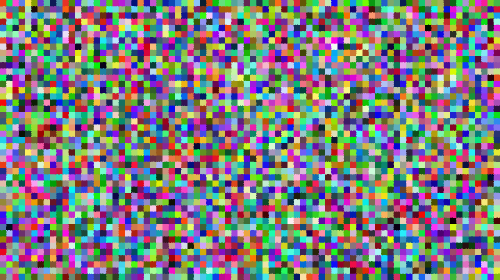

iter: 10, loss: 2.63502, losses: 0.936401, 0.834118, 0.864504
iter: 20, loss: 2.56236, losses: 0.923353, 0.803531, 0.835473


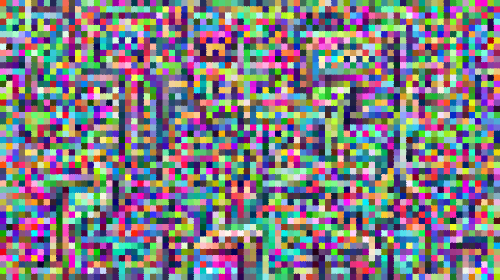

iter: 30, loss: 2.48789, losses: 0.903825, 0.780103, 0.803966
iter: 40, loss: 2.37749, losses: 0.865986, 0.752216, 0.759289


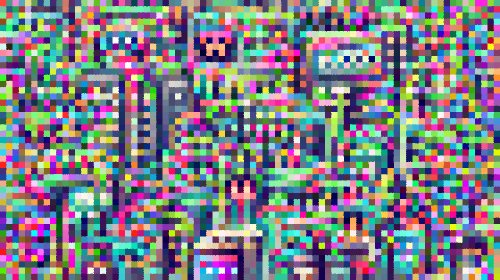

iter: 50, loss: 2.29378, losses: 0.844584, 0.7288, 0.720392
iter: 60, loss: 2.25087, losses: 0.833629, 0.716779, 0.700465


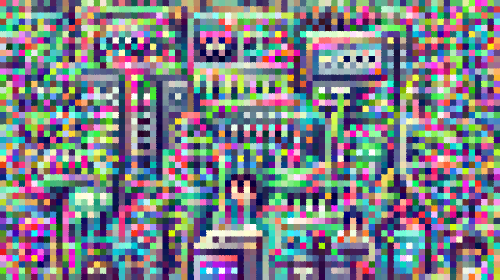

iter: 70, loss: 2.26762, losses: 0.847846, 0.712902, 0.706872
iter: 80, loss: 2.27406, losses: 0.855556, 0.711688, 0.706814


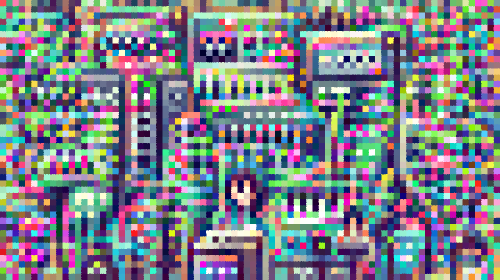

iter: 90, loss: 2.25295, losses: 0.84277, 0.705987, 0.704192
iter: 100, loss: 2.22759, losses: 0.837513, 0.695054, 0.695018


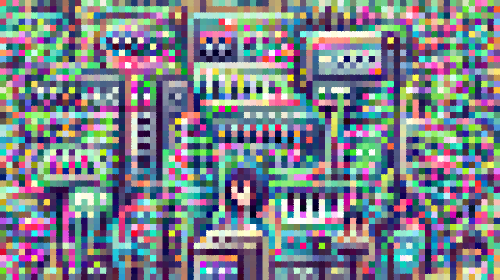

iter: 110, loss: 2.24029, losses: 0.839629, 0.705931, 0.694726
iter: 120, loss: 2.24497, losses: 0.839729, 0.704409, 0.700836


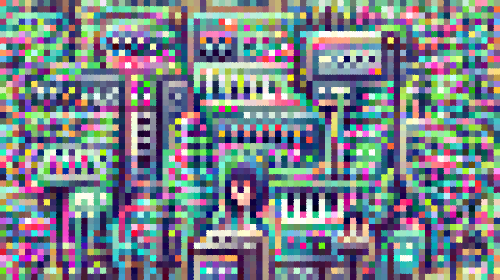

iter: 130, loss: 2.1927, losses: 0.820287, 0.693191, 0.679219
iter: 140, loss: 2.19653, losses: 0.824391, 0.694244, 0.677898


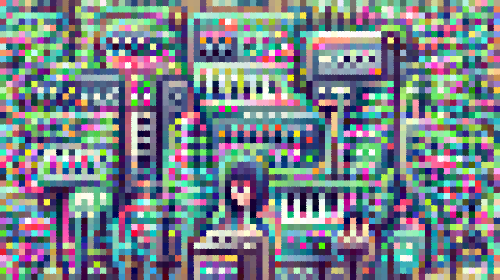

iter: 150, loss: 2.20178, losses: 0.824275, 0.695091, 0.682409
iter: 160, loss: 2.19174, losses: 0.818718, 0.691039, 0.681986


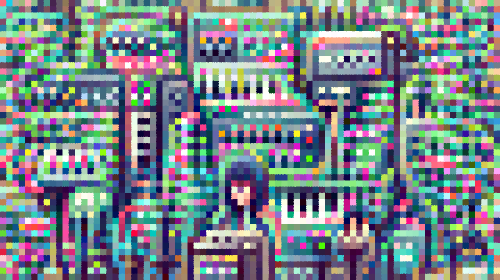

iter: 170, loss: 2.09073, losses: 0.770262, 0.672333, 0.648132
iter: 180, loss: 2.18969, losses: 0.815559, 0.691574, 0.682553


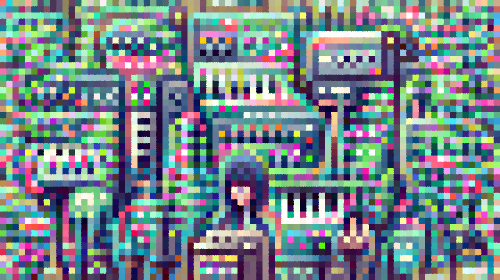

iter: 190, loss: 2.09094, losses: 0.775018, 0.668675, 0.647244
iter: 200, loss: 2.16711, losses: 0.810429, 0.68321, 0.673472


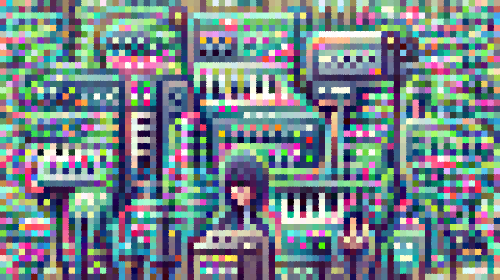

iter: 210, loss: 2.07176, losses: 0.768572, 0.660236, 0.64295
iter: 220, loss: 2.17702, losses: 0.81948, 0.683576, 0.673961


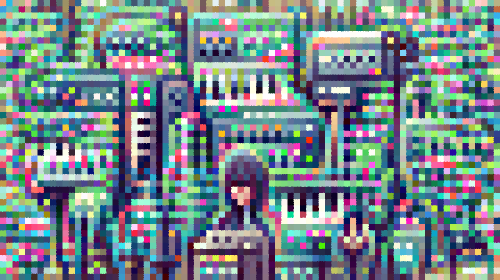

iter: 230, loss: 2.15968, losses: 0.810725, 0.677383, 0.671572
iter: 240, loss: 2.13654, losses: 0.800687, 0.671612, 0.664243


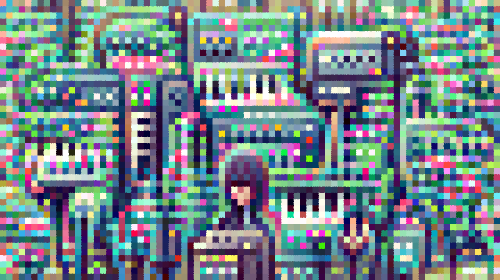

iter: 250, loss: 2.0785, losses: 0.771521, 0.661967, 0.645013
iter: 260, loss: 2.16283, losses: 0.811304, 0.679887, 0.671636


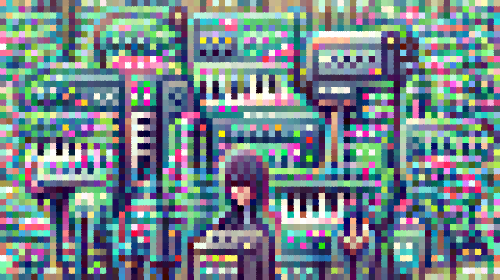

iter: 270, loss: 2.16884, losses: 0.816115, 0.680396, 0.672327
iter: 280, loss: 2.15533, losses: 0.80957, 0.677543, 0.66822


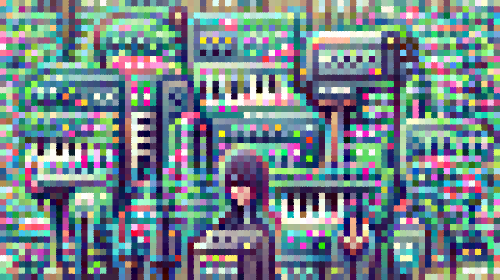

iter: 290, loss: 2.16752, losses: 0.812084, 0.682144, 0.673293
iter: 300, loss: 2.0576, losses: 0.764734, 0.653363, 0.639507


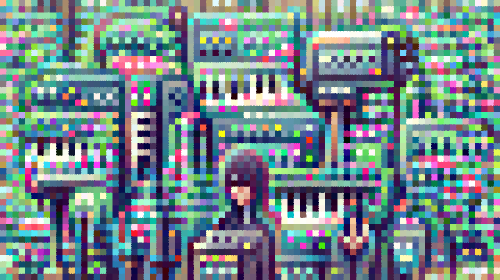

iter: 310, loss: 2.13292, losses: 0.799822, 0.671412, 0.661687
iter: 320, loss: 2.13581, losses: 0.801465, 0.669927, 0.664417


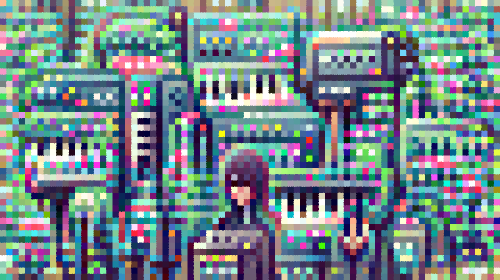

iter: 330, loss: 2.05178, losses: 0.767062, 0.647079, 0.637636
iter: 340, loss: 2.14098, losses: 0.80365, 0.670635, 0.6667


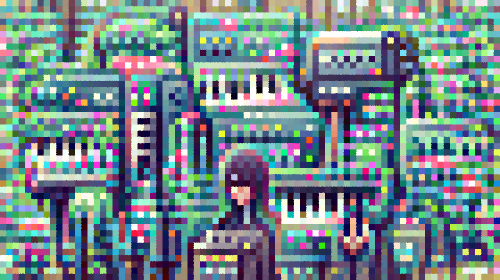

iter: 350, loss: 2.17916, losses: 0.816105, 0.684301, 0.678755
iter: 360, loss: 2.04678, losses: 0.762565, 0.64942, 0.634791


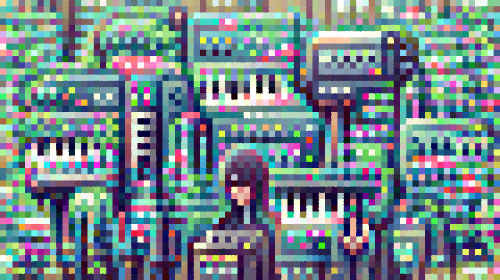

iter: 370, loss: 2.15293, losses: 0.806654, 0.673955, 0.672321
iter: 380, loss: 2.04841, losses: 0.763497, 0.648631, 0.636282


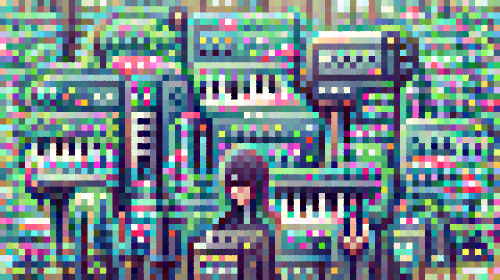

iter: 390, loss: 2.12494, losses: 0.796803, 0.666918, 0.661223
iter: 400, loss: 2.12725, losses: 0.796475, 0.669859, 0.660919


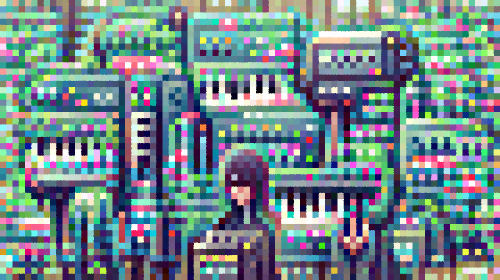

iter: 410, loss: 2.047, losses: 0.763818, 0.648857, 0.634323
iter: 420, loss: 2.15648, losses: 0.80452, 0.677807, 0.674156


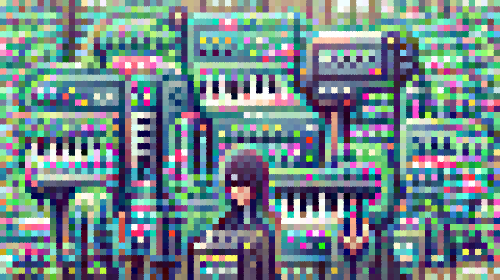

iter: 430, loss: 2.02957, losses: 0.75547, 0.642701, 0.631401
iter: 440, loss: 2.03939, losses: 0.761561, 0.643296, 0.634538


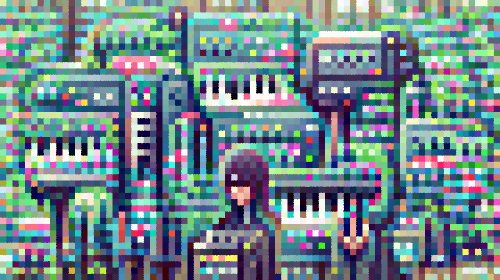

iter: 450, loss: 2.15101, losses: 0.803751, 0.679586, 0.667677
iter: 460, loss: 2.03768, losses: 0.759728, 0.645747, 0.632203


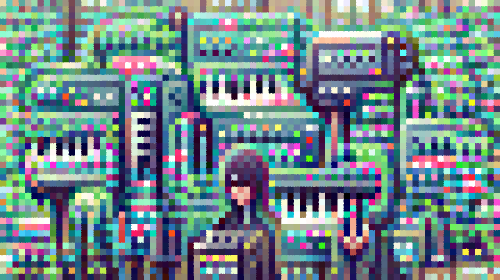

iter: 470, loss: 2.02326, losses: 0.750439, 0.643048, 0.629778
iter: 480, loss: 2.15647, losses: 0.806012, 0.678203, 0.672258


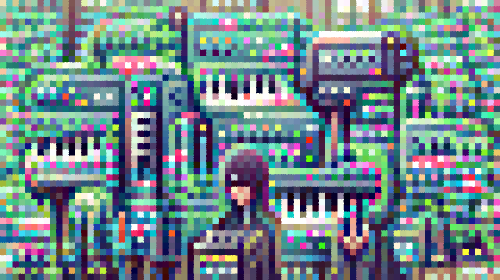

iter: 490, loss: 2.03866, losses: 0.758066, 0.647395, 0.633198
iter: 500, loss: 2.12439, losses: 0.795865, 0.665681, 0.662846


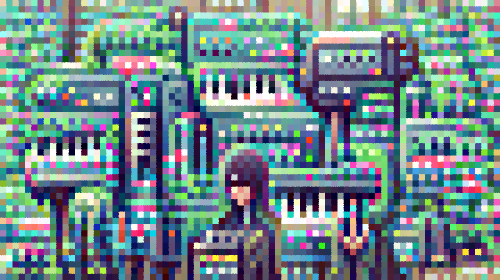

In [2]:
#@title Settings
 
#@markdown Enter a description of what you want to draw - I usually add #pixelart to the prompt.
#@markdown If PixelDraw is not used, it will use VQGAN instead.
#@markdown <br>
 
prompts = "synthesizer. #pixelart" #@param {type:"string"}
 
aspect = "widescreen" #@param ["widescreen", "square"]
 
use_pixeldraw = True #@param {type:"boolean"}
 
#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and start generating images below.
 
#@markdown When that is done you can change these
#@markdown settings and see if you get different results. Or if you get
#@markdown impatient, just select "Runtime -> Interrupt Execution".
#@markdown Note that the first time you run it may take a bit longer
#@markdown as nessary files are downloaded.
 
 
#@markdown
#@markdown *Advanced: you can also edit this cell and add add additional
#@markdown settings, combining settings from different notebooks.*
 
 
# Simple setup
import clipit
 
# these are good settings for pixeldraw
clipit.reset_settings()
clipit.add_settings(prompts=prompts, aspect=aspect)
clipit.add_settings(quality="better", scale=2.5)
clipit.add_settings(use_pixeldraw=use_pixeldraw)
 
#### YOU CAN ADD YOUR OWN CUSTOM SETTING HERE ####
# this is the example of how to run longer with less frequent display
# clipit.add_settings(iterations=500, display_every=50)
 
settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)